# 2.4 Схема проекта с отложенной выборкой (разбиением на train test)

Что будем делать:
- получим данные
- сформируем тренировочный и тестовый датасеты
- обучим модель
- оценим результат

## Загрузка данных

In [76]:
import pandas as pd

df = pd.read_csv("data/house_prices.csv")

## Обзор данных

In [77]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [78]:
df.shape

(20000, 9)

## Выделение матрицы объект-признак и целевой переменной

In [79]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

## Разбиение выборки на тренировочную и тестовую части

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Обучение модели на тренировочных данных

In [81]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

## Предсказание модели на тестовых данных

In [82]:
prediction = model.predict(X_test)

In [83]:
prediction[:10]

array([  3634.54014459, 212458.46103116, 278501.95085509,  70041.88004127,
       304070.89408958, 131388.863149  , 132069.04298239, 415036.94795881,
       356753.34288172, 196207.91156303])

## Вычисление метрики MSE на тестовых данных

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

mean_squared_error(y_test, prediction)

4807903806.065134

In [85]:
mean_squared_error(y_test, prediction) ** 0.5

69339.0496478365

In [86]:
print(f'{mean_absolute_percentage_error(y_test, prediction):.2f}')

0.30


# 2.6 Разведочный анализ данных

Это задание посвящено изучению данных и построению различных визуализаций.  
Наша цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности.

Мы будем работать с датассетом пассажиров [Титаника](https://en.wikipedia.org/wiki/Titanic).

Классическая задача, решаемая на этих данных: предсказать, выжил пассажир или нет по его характеристикам.  
То есть целевая переменная - столбец `Survived`.

Цели:
* познакомиться с библиотекой `seaborn`
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Бонус:
* придумаем свою модель на основе проведенного анализа и оценим ее качество.

## Подключение библиотек и загрузка данных

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

Фиксируем `random_state` для воспроизводимости случайных значений.

In [88]:
RANDOM_STATE = 42

Загрузим данные.

In [89]:
Data = pd.read_csv("data/titanik.csv", sep=";")

**Описание признаков**

- `Survived` — выжил данный пассажир или нет (*0* для умерших, *1* для выживших)
- `Pclass` — класс пассажира (*1* — высший, *2* — средний, *3* — низший)
- `Name` — имя
- `Sex` — пол
- `Age` — возраст
- `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника
- `Parch` — количество родителей, детей (в том числе приемных) на борту титаника
- `Ticket` — номер билета
- `Fare` — плата за проезд
- `Cabin` — каюта
- `Embarked` — порт посадки (*C* — Шербур; *Q* — Квинстаун; *S* — Саутгемптон)

## Обзор данных

Посмотрим на *5* случайных объектов из датасета.

In [90]:
Data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
882,883,0,3,Dahlberg; Miss. Gerda Ulrika,female,22.0,0,0,7552,10.5167,NaN,S
111,112,0,3,Zabour; Miss. Hileni,female,14.5,1,0,2665,14.4542,NaN,C
860,861,0,3,Hansen; Mr. Claus Peter,male,41.0,2,0,350026,14.1083,NaN,S
381,382,1,3,"Nakid; Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
519,520,0,3,Pavlovic; Mr. Stefo,male,32.0,0,0,349242,7.8958,NaN,S


Выведите на экран размеры таблицы *Data*.

**Вопрос:** сколько объектов в данных?

In [91]:
len(Data)

891

## Обработка признаков и однофакторный анализ

На данном этапе:

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

Выведем на экран основные числовые характеристики числовых столбцов.  
Это можно сделать при помощи функции `describe`.

In [92]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


В строке *count* отображается количество непропущенных значений в каждом столбце.

Основные статистики можно посмотреть и по категориальным колонкам.  
Для этого в функцию `describe` нужно передать аргумент `include='object'`.

Сделайте это.

In [93]:
Data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,3,681,147,3
top,Braund; Mr. Owen Harris,male,347082,B96 B98,S
freq,1,574,7,4,644


In [94]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [95]:
Data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Вопрос:** в скольких категориальных колонках есть пропуски?

In [96]:
categorical = []
for col in Data.columns:
    if Data[col].dtype == object:
        categorical.append(col)
res = 0
for col in categorical:
    if Data[col].isna().sum() > 0:
        res += 1
print(res)

2


### Столбец Sex

В столбце пол (`Sex`) три различных значения. Посмотрим на них.

In [97]:
Data['Sex'].value_counts()

Sex
male       574
female     312
unknown      5
Name: count, dtype: int64

Удалим пассажиров неизвестного пола, так как их всего *5*.

In [98]:
Data = Data[Data['Sex'] != 'unknown']

Проверьте, что строки с неизвестным полом исчезли.

In [99]:
display(Data['Sex'].describe())
Data['Sex'].unique()

count      886
unique       2
top       male
freq       574
Name: Sex, dtype: object

array(['male', 'female'], dtype=object)

Признак `Sex` является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа.

Закодировать значения столбца с двумя категориями можно следующим образом. Пусть в воображаемом столбце *animal* есть два значения: *cat* и *dog*. Их можно перевести в *0* и *1* при помощи функции `map`:

`Data['animal'] = Data['animal'].map({'cat' : 1, 'dog' : 0})`


По аналогии закодируйте столбец `Sex` (*male* - *1*, *female* - *0*).

In [100]:
Data['Sex'] = Data['Sex'].map({'male': 1, 'female': 0})

**Вопрос** посчитайте сумму значений в закодированном столбце `Sex`.

In [101]:
Data['Sex'].sum()

574

Посмотрим, как влияет пол на выживаемость.

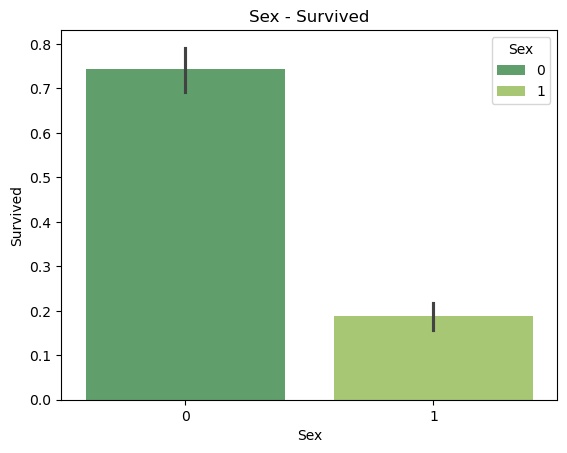

In [102]:
sns.barplot(x='Sex', y='Survived', data=Data, hue='Sex', palette='summer')
plt.title('Sex - Survived')
plt.show();

Гистограмму можно детализировать, добавив значение параметра `hue`.

### Столбец Pclass

Нарисуйте гистограмму выживаемости в зависимости от `Pclass`.  
Используйте `barplot`.

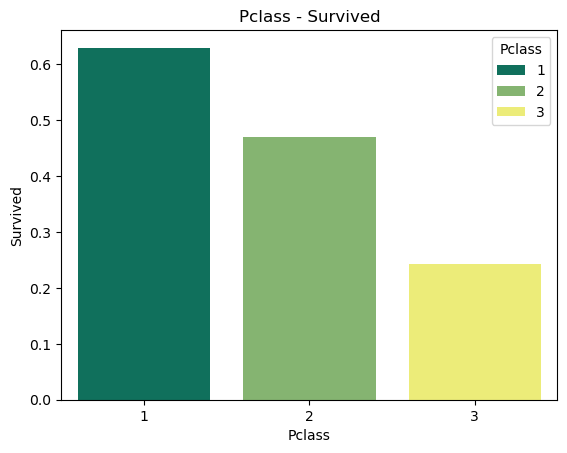

In [103]:
sns.barplot(data=Data, x='Pclass', y='Survived', hue='Pclass', palette='summer', errorbar=None)
plt.title('Pclass - Survived')
plt.show();

**Вопрос:** пассажиры из какого класса выживали чаще всего?

Посмотрим, как влияет пол человека и класс билета (`Pclass`) на выживаемость

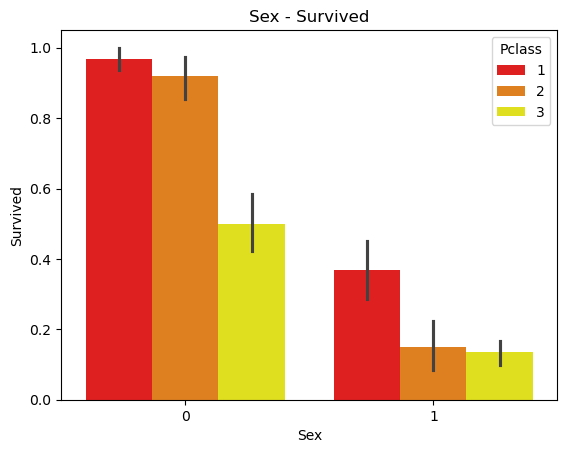

In [104]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
plt.title('Sex - Survived')
plt.show();

### Столбец Embarked

**Вопрос** сколько различных значений принимает признак `Embarked`?

In [105]:
Data['Embarked'].nunique()

3

Пока что мы не обсуждали, как переводить в числа категориальные признаки с больше, чем двумя категориями.  
Поэтому давайте отбросим этот признак.

Сделайте это (вам пригодится метод [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)).

In [106]:
del Data['Embarked']

In [107]:
Data.shape

(886, 11)

### Столбец Age

Обработаем признак `Age`.

Мы помним, что в этом признаке много пропусков.

Заполним пропуски медианным значением `Age`.

In [108]:
median_age = Data['Age'].median()

Data['Age'] = Data['Age'].fillna(median_age)

Нарисуем распределение возраста пассажиров.

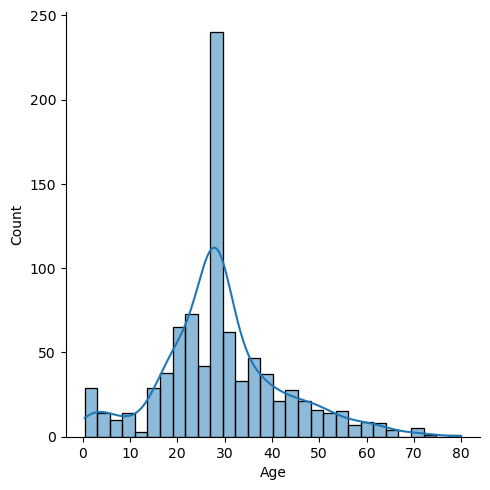

In [109]:
sns.displot(Data['Age'], kde=True)
plt.show();

### Другие столбцы

Удалите признак `Fare`. Он сильно связан с признаком `Pclass`, поэтому нам не нужен.

In [110]:
Data = Data.drop('Fare', axis=1)

**Вопрос:** сколько на данный момент колонок в таблице `Data`?

Столбец `PassengerId` является категориальным и не несёт важной информации, удалите его.

Столбцы `Ticket`, `Name` и `Cabin` в этот раз нам также не понадобятся. Удалите и их.

In [111]:
Data.drop(columns=['PassengerId', 'Ticket', 'Name', 'Cabin'], inplace=True)

После минимальной обработки данных у нас получилась следующая таблица:

In [112]:
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


## Исследование признаков

Нарисуйте матрицу корреляций столбцов между собой.

In [113]:
Data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch
Survived,1.000000,-0.338447,-0.545547,-0.062245,-0.033743,0.085753
Pclass,-0.338447,1.000000,0.133972,-0.342216,0.083148,0.015606
Sex,-0.545547,0.133972,1.000000,0.081486,-0.114677,-0.259232
Age,-0.062245,-0.342216,0.081486,1.000000,-0.235465,-0.177241
SibSp,-0.033743,0.083148,-0.114677,-0.235465,1.000000,0.422104
Parch,0.085753,0.015606,-0.259232,-0.177241,0.422104,1.000000


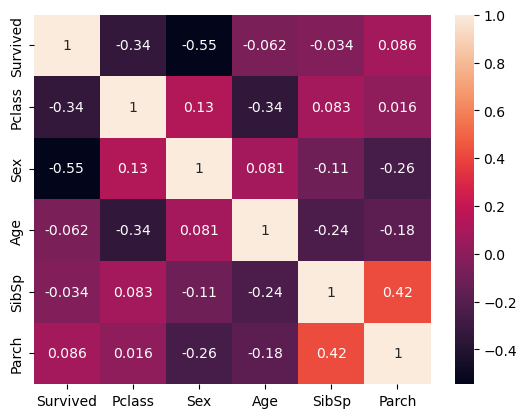

In [114]:
sns.heatmap(data=Data.corr(), annot=True)
plt.show();

**Вопрос:** какой столбец сильнее всего коррелирует с целевой переменной `Survived`?

Посмотрим на попарные зависимости некоторых признаков.

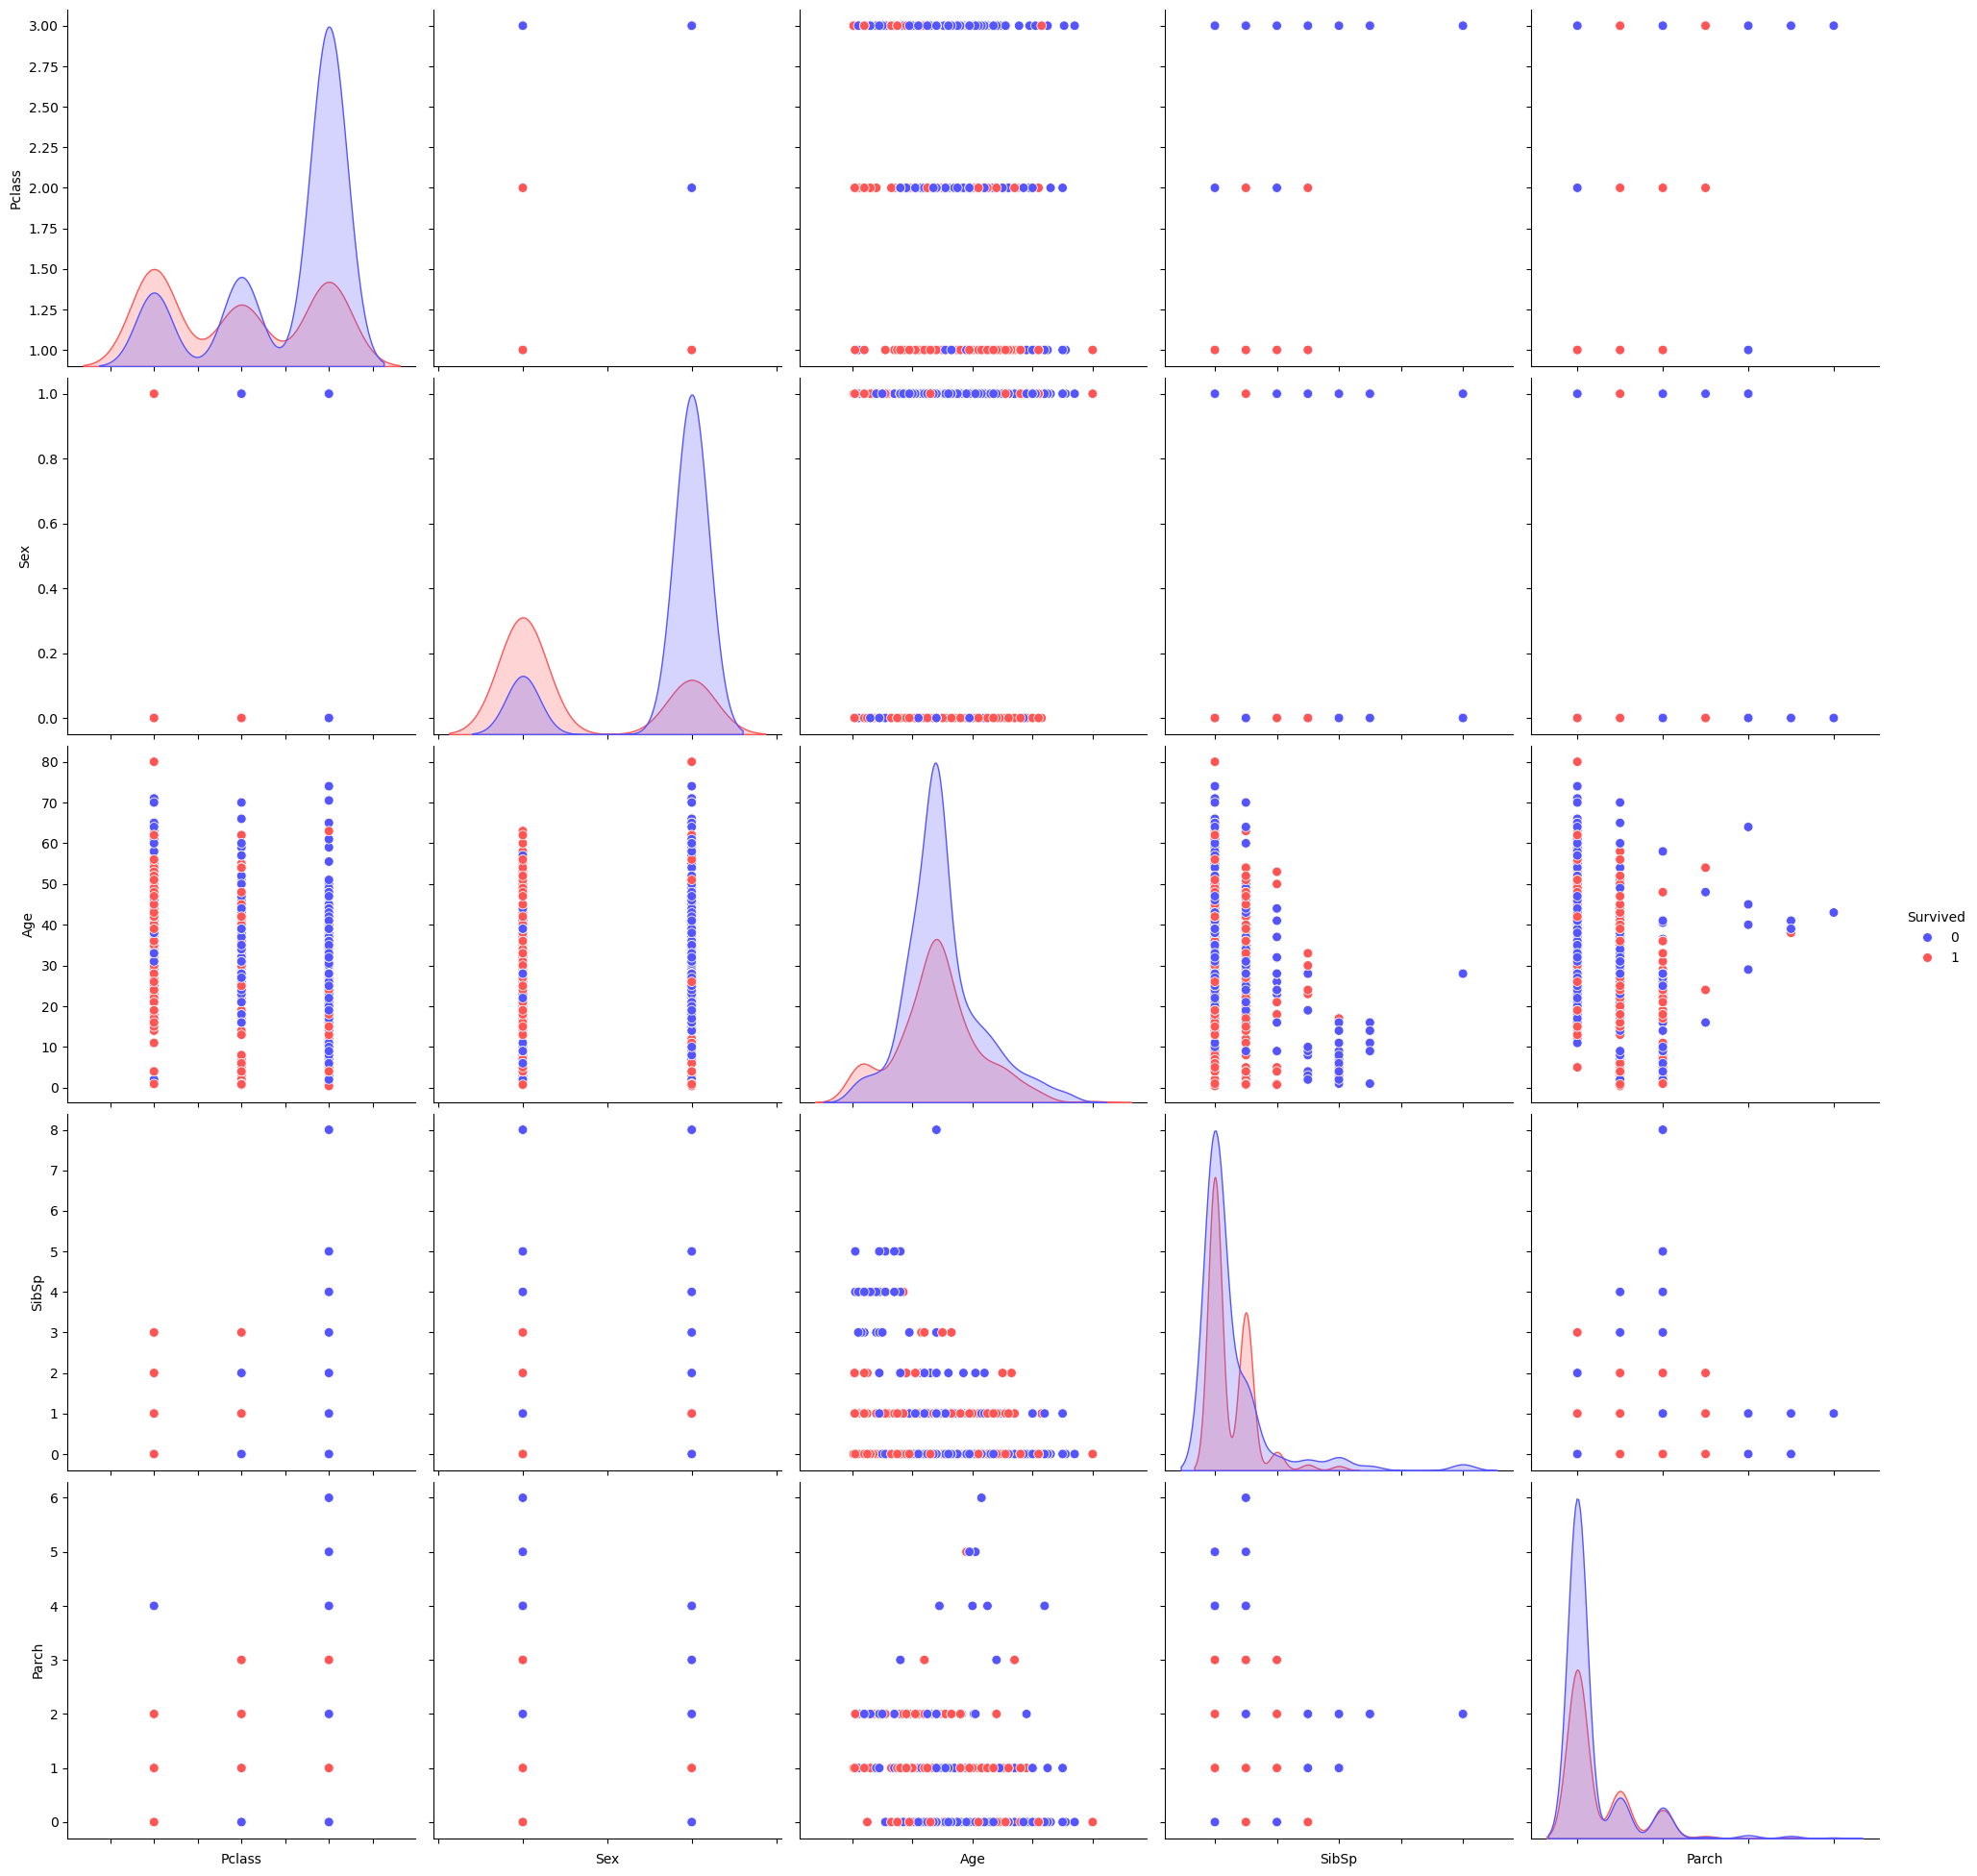

In [115]:
g = sns.pairplot(
    Data,
    hue='Survived',
    palette = 'seismic',
    height=4,
    diag_kind = 'kde',
    diag_kws=dict(fill=True),
    plot_kws=dict(s=50)
    )

g.set(xticklabels=[]);

## Бонус (не проверяется)

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки `Parch` и `SibSp` слабо коррелируют с выживаемостью (`Survived`). Можно сконструировать новые признаки, чтобы решить эти вопросы.

Попробуйте сделать следующее.

1) Создайте признак `NameLen` и запишите в него длину имени (`Name`).

2) Создайте признак `FamilySize`, равный *Parch + SibSp + 1*. Зачем добавлять 1?

3) Создайте признак `IsAlone`, который показывает, путешествовал человек один или с семьей.

In [116]:
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [117]:
# ваш код здесь

Посмотрите, как коррелируют новые признаки со столбцом `Survived`.

In [118]:
# ваш код здесь

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков.

Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [119]:
# ваш код здесь

Мы провели  однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет.

Мы видим, что больше всего на выживаемость влияет пол пассажира.


### Наша собственная модель

Напишем свою модель, предсказывающую выживаемость только по признаку `Sex`.

In [120]:
def prediction(x):
    if x.Sex == 1:
        return 0
    return 1

Посчитаем долю правильных ответов нашей модели.

In [121]:
from sklearn.metrics import accuracy_score

pred = Data.apply(lambda x: prediction(x), axis=1)

accuracy_score(Data['Survived'], pred)

0.7878103837471784

# 2.7  Домашнее задание - 1

## Описание задачи и загрузка данных

В этом задании вам нужно обучить линейную регрессию для предсказания стоимости домов в Калифорнии.

Загружаем необходимые библиотеки.

In [122]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing

Фиксируем `random_state` для воспроизводимости случайных значений.

In [123]:
RANDOM_STATE = 42

Загрузим данные и сформируем из них матрицу объект-признак `X` и вектор `y`, содержащий целевую переменную.

In [124]:
Data = fetch_california_housing(as_frame=True)

X = Data['data']
y = Data['target']

Посмотрим первые пять записей набора данных.

In [125]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## Задание 1

 Сколько строк и столбцов в матрице `X`?

In [126]:
X.shape

(20640, 8)

Посмотрим на зависимость стоимости домов (целевой переменной `y`) от признака `MedInc` (`Median Income`).
Для этого можно нарисовать диаграмму рассеяния.

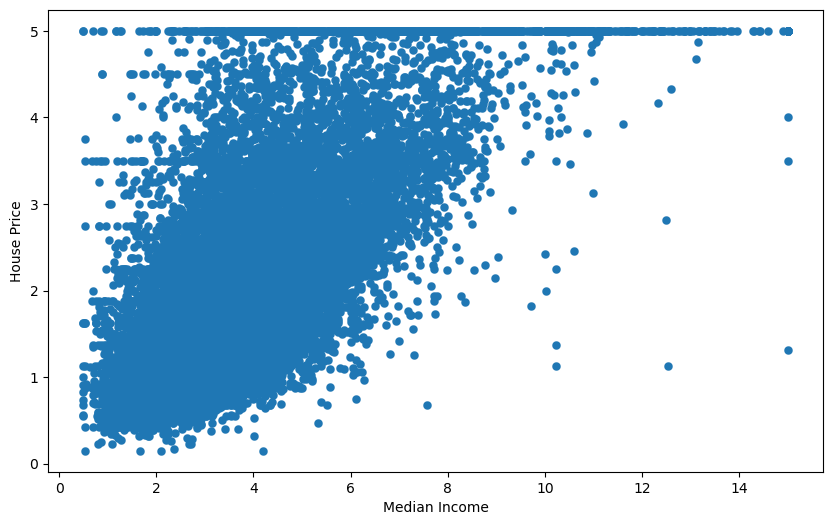

In [127]:
plt.figure(figsize=[10, 6])
plt.scatter(X['MedInc'], y, linewidths=0.1)
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.show();

По диаграмме видно, что чем больше `Median Income`, тем больше `House Price`, то есть видна прямая зависимость целевой переменной от признака `MedInc`.

## Задание 2

Постройте диаграмму рассеяния, отображающую зависимость целевой переменной от признака `Latitude`.
Какая это зависимость?

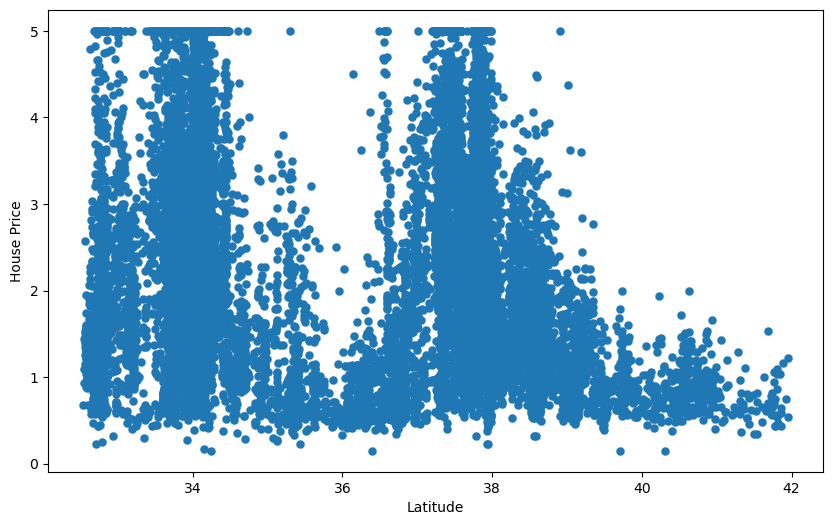

In [128]:
plt.figure(figsize=[10, 6])
plt.scatter(X['Latitude'], y, linewidths=0.1)
plt.xlabel('Latitude')
plt.ylabel('House Price')
plt.show();

Ещё немного поисследуем данные. Полноценный разведочный анализ в рамках этого задания, конечно, не провести, но какие-то инструменты мы потрогаем.

Давайте построим тепловую карту корреляций.

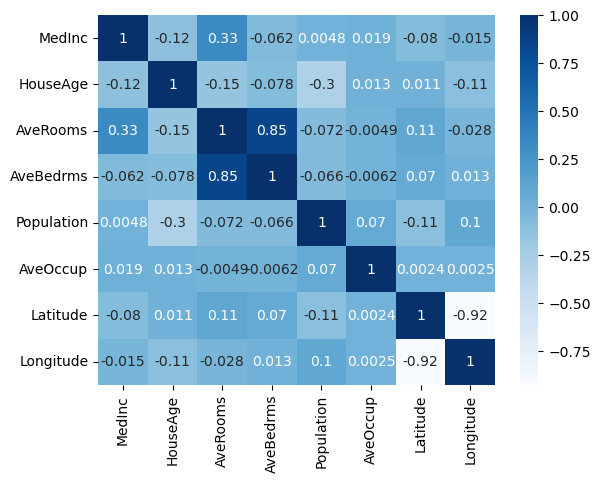

In [129]:
corr = X.corr()
sb.heatmap(corr, cmap="Blues", annot=True);

По этой матрице корреляций видно, что два наиболее зависимых признака - это `AveRooms` и `AveBedrms`.

Но интереснее посмотреть, какой признак имеет наибольшую корреляцию с целевой переменной!

## Задание 3

Добавьте к матрице `X` столбец `y` и постройте матрицу корреляций.
Какой признак имеет наибольшую по модулю корреляцию с таргетом?
После выполнения задания удалите добавленный столбец `y` из матрицы `X`.

In [130]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


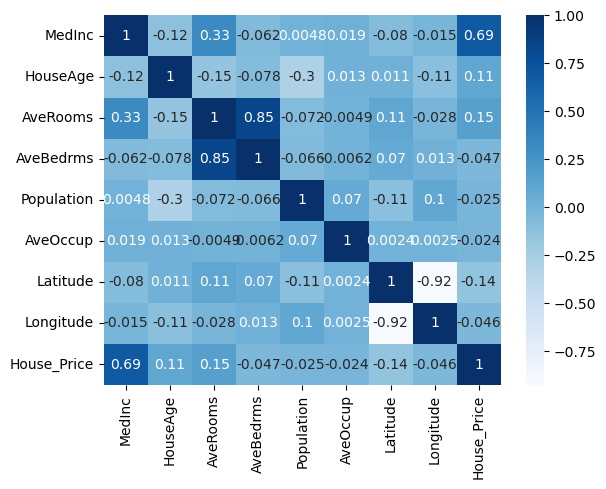

In [131]:
df = X.copy()
df.insert(df.shape[1], 'House_Price', y)
corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)
plt.show();

In [132]:
df.corr().sort_values('House_Price')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House_Price
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
House_Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Разбейте данные на тренировочную и тестовую часть (в тест отправьте 25% данных).

In [133]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

##Задание 4

Сколько объектов попали в тест?

In [134]:
Xtest.shape

(5160, 8)

Обучите линейную регрессию с параметрами по умолчанию на тренировочных данных и сделайте предсказание на тестовых данных.

In [135]:
# ваш код здесь
from sklearn.linear_model import LinearRegression

linreg_model = LinearRegression()
linreg_model.fit(Xtrain, ytrain)

LinearRegression()

In [136]:
# ваш код здесь
ypred = linreg_model.predict(Xtest)
ypred[:10]

array([1.44381422, 2.03585427, 3.14213255, 1.55608147, 3.01265762,
       2.92701391, 1.70505361, 3.46798151, 1.94055937, 1.28296232])

## Задание 5

Вычислите значение метрики *MSE* на тестовых данных.
Ответ округлите до десятых.

In [137]:
from sklearn.metrics import mean_squared_error

round(mean_squared_error(ytest, ypred), 1)

0.6

# 3.1 Линейная регрессия

Будем решать задачу регрессии - предсказывать стоимость домов в Калифорнии.

In [138]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing

Загрузим данные.

In [139]:
Data = fetch_california_housing(as_frame=True)

X = Data['data']
y = Data['target']

In [140]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [141]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

Обучим модель линейной регрессии на исходных данных.

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

In [143]:
model = LinearRegression()

model.fit(Xtrain, ytrain)

pred = model.predict(Xtest)

In [144]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

mean_squared_error(ytest, pred) ** 0.5

0.7246457803915417

In [145]:
mean_absolute_percentage_error(ytest, pred)

0.3233838581234404

In [146]:
r2_score(ytest, pred)

0.6012130996264827

Добавим полиномиальные признаки второй степени:

$$1, x_1, x_2 \to 1, x_1, x_2, x_1^2, x_2^2, x_1x_2.$$

In [147]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 2)

pf.fit(Xtrain)

Xtrain_new = pf.transform(Xtrain)
Xtest_new = pf.transform(Xtest)

In [148]:
Xtrain_new[:1].shape

(1, 45)

Обучим на обогащенных признаках модель.

In [149]:
model.fit(Xtrain_new, ytrain)

pred2 = model.predict(Xtest_new)

In [150]:
mean_squared_error(ytest, pred2) ** 0.5

0.6699843404239793

In [151]:
mean_absolute_percentage_error(ytest, pred2)

0.2719000264796399

In [152]:
r2_score(ytest, pred2)

0.6591065531824098

In [153]:
Xtrain_new.shape

(15480, 45)

Ошибка уменьшилась!

# 3.6  Домашнее задание - 2

## Описание задачи и загрузка данных

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [155]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Посмотрим на типы столбцов.

In [156]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

## Построение модели

### Задание 1

Есть ли в наборе данных пропущенные значения? Если да, удалите их.

Также выведите на экран число пропусков в каждом столбце.

In [157]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

### Задача 2

Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)?  
Если да, то удалите их.

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [159]:
data.drop('Unnamed: 0', axis=1, inplace=True)

### Задание 3

Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются корреляции между признаками.  
Выведите матрицу корреляций между всеми вещественными признаками и целевой переменной.

Какой вещественный признак коррелирует с целевой переменной больше всего?

In [160]:
corr = data.corr(numeric_only=True)
corr.sort_values('price')

,carat,depth,table,price,x,y,z
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249


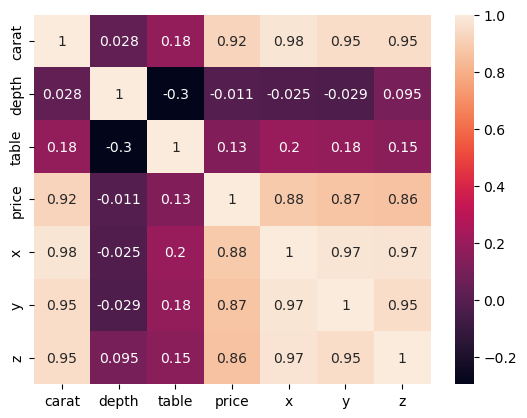

In [161]:
sns.heatmap(data=corr, annot=True)
plt.show();

### Задание 4

Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования ([`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Не забудьте поставить значение параметра `drop_first` равным `True`.

Сколько получилось столбцов в таблице `data`?

*P.S. Числовые столбцы оставляем в таблице без изменений.*

In [162]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [163]:
categorical = [col for col in data.columns if data[col].dtype == 'object']
print(categorical)

data = pd.get_dummies(data=data, columns=categorical, drop_first=True)

data.head()

['cut', 'color', 'clarity']


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [164]:
data.shape

(53940, 24)

### Задание 5

Создайте матрицу `X`, содержащую все признаки, и не содержащую целевую переменную `price`. Также создайте вектор `y`, содержащий целевую переменную `price`.

In [165]:
X = data.drop('price', axis=1)
y = data['price']

Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной `0.3`.

При разбиении укажите `random_state = 42`.

In [166]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

### Задание 6

Зачастую при использовании линейных моделей вещественные признаки масштабируются.  В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

*  Обучите (`fit`) scaler на тренировочных данных
*  Преобразуйте (`transform`) и трейн, и тест

После применения масштабирования матрица перестает быть объектом `pandas.DataFrame` - решите эту проблему.

In [167]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [168]:
scaler.fit(Xtrain)
Xtrain_scale = scaler.transform(Xtrain)
Xtest_scale = scaler.transform(Xtest)

### Задание 7

Обучите линейную регрессию на тренировочной выборке. Выведите *r2-score* на тренировочной и тестовой выборках.

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linreg_model = LinearRegression()
linreg_model.fit(Xtrain_scale, ytrain)

ypred = linreg_model.predict(Xtest_scale)

r2_score(ytest, ypred)

0.9201866914388087

### Задание 8

Выведите на экран веса, которые линейная регрессия присвоила признакам.

Какой признак имеет наибольший отрицательный вес? (наибольший по модулю среди всех отрицательных весов)

In [170]:
features = Xtrain.columns
weights = linreg_model.coef_
feature_weights = pd.DataFrame({'Feature': features, 'Weight': weights})
feature_weights.sort_values('Weight')

,Feature,Weight
3,x,-1100.418850
15,color_J,-529.449216
14,color_I,-442.783567
13,color_H,-362.002300
12,color_G,-202.863564
11,color_F,-104.560993
1,depth,-90.173817
10,color_E,-83.640021
2,table,-60.332280
5,z,-34.258945


## Попытка улучшить качество модели

Данная часть является творческой, и задания в ней немного сложнее, чем предыдущие.

Следующие вопросы не проверяются тестами.

### Задание 9

Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче, также свидетельствуют об этом. Для решения этой проблемы можно либо исключить некоторые признаки из модели (например, если признак линейно зависим с какими-то другими, его можно исключить из модели, т.е. удалить из матрицы объект-признак и заново обучить модель).

Удалите из матриц `Xtrain` и `Xtest` признак, который наиболее сильно коррелирует с остальными. Заново обучите модель и оцените её качество. Улучшилось ли качество модели?

Попробуйте удалить какой-то другой признак (можете попробовать несколько вариантов). Помогло ли это улучшить качество модели?

In [171]:
drop_col = ['y', 'table', 'depth']
Xtrain = Xtrain.drop(drop_col, axis=1)
Xtest = Xtest.drop(drop_col, axis=1)

In [172]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)

pf.fit(Xtrain)

PolynomialFeatures()

In [173]:
Xtrain_new = pf.transform(Xtrain)
Xtest_new = pf.transform(Xtest)

In [174]:
scaler = StandardScaler()
scaler.fit(Xtrain_new, ytrain)
Xtrain_scale = scaler.transform(Xtrain_new)
Xtest_scale = scaler.transform(Xtest_new)

In [175]:
linreg_model.fit(Xtrain_scale, ytrain)

ypred = linreg_model.predict(Xtest_scale)
r2_score(ypred, ytest)

0.9680888275411034

In [176]:
features = Xtrain.columns
weights = linreg_model.coef_[0]
feature_weights = pd.DataFrame({'Feature': features, 'Weight': weights})
feature_weights.sort_values('Weight')

,Feature,Weight
0,carat,-2.076017e-13
17,clarity_VS2,-2.076017e-13
16,clarity_VS1,-2.076017e-13
15,clarity_SI2,-2.076017e-13
14,clarity_SI1,-2.076017e-13
13,clarity_IF,-2.076017e-13
12,color_J,-2.076017e-13
11,color_I,-2.076017e-13
10,color_H,-2.076017e-13
9,color_G,-2.076017e-13


### Задание 10

Иногда генерация новых признаков помогает модели лучше находить взаимосвязи между целевой переменной и признаками. Попробуйте придумать новые признаки и добавить их в модель.  

Помогло ли это улучшить качество модели?

# 4.1 Градиентный спуск для функции одной переменной

## Импорт библиотек

In [177]:
import numpy as np
from matplotlib import pyplot as plt

## Практика

Найдем локальный минимум функции $f(x)=x^3-5x+2$ методом градиентного спуска.

Сначала определим функцию.

In [178]:
def f(x):
   return x**3 - 5*x + 2

Построим график функции.

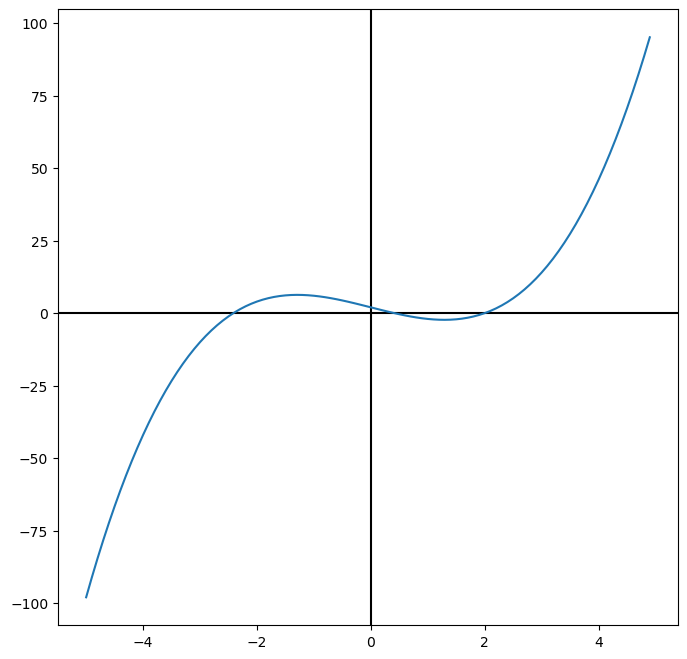

In [179]:
x_values = [x for x in np.arange(-5, 5, 0.1)]
f_values = [f(x) for x in x_values]

plt.figure(figsize=(8,8))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')
plt.plot(x_values, f_values)
plt.show();

Вычислим производную функции $f(x)$:

$f'(x)=3x^2-5$.



In [180]:
import sympy as sp

x = sp.Symbol('x')
fx = x**3 - 5*x + 2
fx_diff = sp.diff(fx, x)
f = sp.lambdify(x, fx_diff)
display(fx_diff)

f(2)

3*x**2 - 5

7

In [181]:
def grad_f (x):
    return 3*(x**2) - 5

Теперь реализуем метод в виде функции.

In [182]:
def gradient_descent(x_start, learning_rate, epsilon, num_iterations):
    x_curr = x_start

    for i in range(num_iterations):
      x_new = x_curr - learning_rate * grad_f(x_curr)

      if abs(x_new - x_curr) < epsilon:
        return x_curr

      x_curr = x_new

    return x_curr

Попробуем стартовать из точки $x_0 = 4$ и идти с маленьким шагом $\eta = 0.01$.

In [183]:
x0 = 4
eta = 0.01
epsilon = 0.001
iterations = 10000

x_res = gradient_descent(x0, eta, epsilon, iterations)
x_res

1.3036113611507372

Отметим найденную точку на графике.

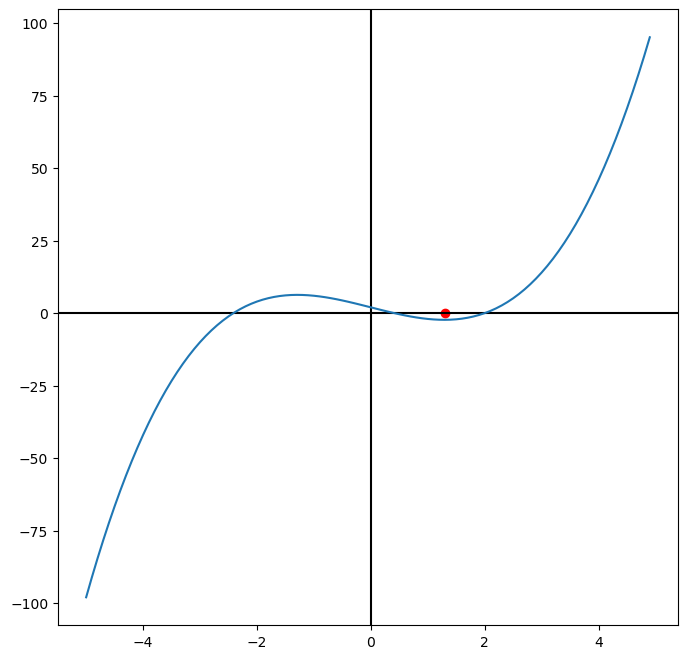

In [184]:
plt.figure(figsize=(8,8))

plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')
plt.plot(x_values, f_values)

plt.scatter(x_res, f(x_res), marker='o', c='red')
plt.show();

In [185]:
# Найдите минимум функции x**4 - 10*x + 3

# Ищите минимум с гиперпараметрами:
# x0 = 5
# n = 0.01
# epsilon = 0.001
# num_iterations = 10000

# Чему равен найденное методом значение x (локальный минимум)?
# Ответ округлите до сотых.

x0 = 5
n = 0.01
epsilon = 0.001
num_iterations = 10000

def f(x):
   return x**4 - 10*x + 3

x = sp.Symbol('x')
expr = x**4 - 10*x + 3
expr_diff = expr.diff(x)
grad_f = sp.lambdify(x, expr_diff)

def gradient_descent(x_start, step, wrong, n_iterations):
    x_curr = x_start

    for _ in range(n_iterations):
        x_new = x_curr - grad_f(x_curr) * step
        
        if abs(x_new - x_curr) < wrong:
            return x_curr
    
        x_curr = x_new

    return x_curr

res = round(gradient_descent(x0, n, epsilon, num_iterations), 2)
res

1.35

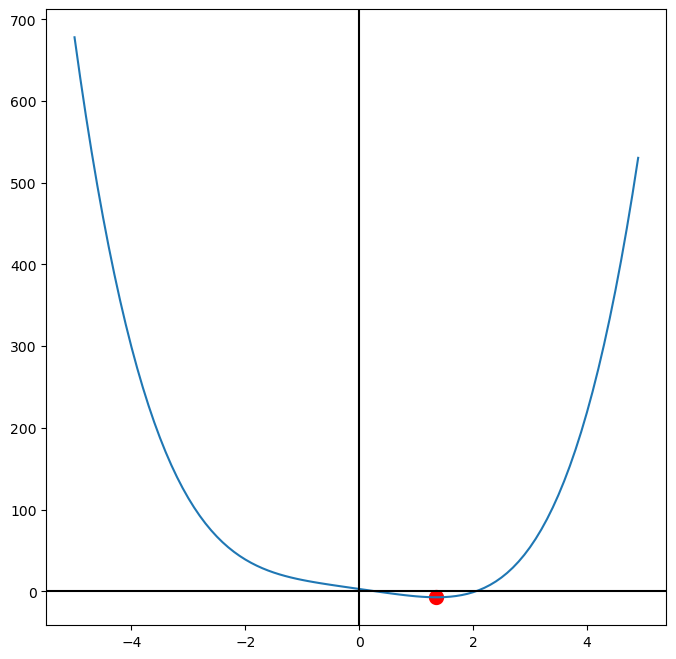

In [186]:
x_values = [x for x in np.arange(-5, 5, 0.1)]
y_values = [f(x) for x in x_values]

plt.figure(figsize=(8, 8))
plt.plot(x_values, y_values)
plt.axvline(x=0, c = 'black')
plt.axhline(y=0, c = 'black')
plt.scatter(res, f(res), marker='o', c='r', linewidths=5)

plt.show();

In [187]:
# Пусть метод стартует из точки w_start=(3,1,1). 
# Пусть шаг градиентного спуска η=0.01

# Чему будет равен вес w1 ​после одного шага градиентного спуска?
# Ответ округлите до сотых

x1 = [10, 5, 7]
x2 = [40, 36, 30]
y = [100, 73, 71]
w_start = [3, 1, 1]
n = 0.01

def grad_f(x1, x2, y, w):
    print(f'{x1} * ({w[0]} + {w[1]} * {x1} + {w[2]} * {x2} - {y})')
    print()
    return x1 * (w[0] + w[1] * x1 + w[2] * x2 - y)

def gradient_descent(x1, x2, y, w_start, step):

    Q_w = 0
    
    for i in range(len(y)):
        Q_w += grad_f(x1[i], x2[i], y[i], w_start)

    
    w1 = w_start[1] - (2 / 3 * Q_w) * step

    return w1

res = round(gradient_descent(x1, x2, y, w_start, n), 2)
res

10 * (3 + 1 * 10 + 1 * 40 - 100)

5 * (3 + 1 * 5 + 1 * 36 - 73)

7 * (3 + 1 * 7 + 1 * 30 - 71)



6.55

# 4.2 Градиентный спуск для функции нескольких переменных

## Импорт библиотек

In [188]:
import pandas as pd
import numpy as np

In [189]:
RANDOM_STATE = 42
np.random.RandomState(RANDOM_STATE);

## Практика

Создадим таблицу с обучающими данными.

In [190]:
df = pd.DataFrame({'x1' : [10, 5, 7], 'x2' : [40, 36, 30], 'y' : [100, 73, 71]})
df

,x1,x2,y
0,10,40,100
1,5,36,73
2,7,30,71


In [191]:
def prediction(w, x1, x2):
    return w[0] + w[1] * x1 + w[2] * x2

In [192]:
def grad_MSE(w, x1, x2, y):
    dw0 = (2/3) * (w[0] + w[1]*x1 + w[2]*x2 - y)
    dw1 = (2/3) * x1 * (w[0] + w[1]*x1 + w[2]*x2 - y)
    dw2 = (2/3) * x2 * (w[0] + w[1]*x1 + w[2]*x2 - y)

    return np.array([dw0, dw1, dw2])

In [193]:
grad_MSE((1, 1, 1), 10, 40, 100)

array([  -32.66666667,  -326.66666667, -1306.66666667])

In [194]:
def gradient_descent(data, w_start, learning_rate, num_iterations):
    w_curr = w_start

    for i in range(num_iterations):
      GradMSE = np.zeros(3)
      for _, row in data.iterrows():
          x1, x2, y = row
          GradMSE += grad_MSE(w_curr,x1,x2,y)

      w_new = w_curr - learning_rate * GradMSE

      w_curr = w_new

    return w_curr

In [195]:
gradient_descent(df, np.random.rand(3), 0.0001, 5000)

array([0.46905651, 3.96928859, 1.46806981])

# 4.2 Градиентный спуск для функции нескольких переменных (векторная форма)

## Импорт библиотек

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [197]:
RANDOM_STATE = 42
np.random.RandomState(RANDOM_STATE);

## Практика

Обучающие данные.

In [198]:
df = pd.DataFrame({'x1' : [10, 5, 7], 'x2' : [40, 36, 30], 'y' : [100, 73, 71]})
df

,x1,x2,y
0,10,40,100
1,5,36,73
2,7,30,71


Реализуем метод градиентного спуска для обучения линейной регрессии.

Сначала напишем функцию для вычисления среднеквадратичной ошибки

$MSE = \frac{1}{m}||Xw - y||^2_2$.

Здесь квадратичная ошибка записана в матричном виде, т.е. $X$ - матрица объект-признак, $w$ - вектор весов модели.
*  $Xw$ - вектор предсказания модели
*  $y$ - вектор правильных ответов,
и квадратичная ошибка - это квадрат нормы разности вектора предсказания и вектора правильных ответов.

Вычислить норму вектора в python можно разными способами.  
Здесь мы  воспользуемся готовой функцией из библиотеку numpy - `numpy.linalg.norm`.

In [199]:
def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

Реализуем градиентный спуск по формуле

$$w_{new} = w_{prev} - \nabla_w Q(w_{prev})$$

Вычислим градиент MSE:
$$\nabla_w Q(w)=\frac2m X^T(Xw-y).$$

Итак, реализуем метод градиентного спуска:

*  первым шагом добавим к матрице `X` единичный столбец - это константный признак, равный 1 на всех объектах.  
Он нужен, чтобы записать предсказание линейной регрессии в виде скалярного произведения и тем самым избавиться от знака суммы:
$a(x)=w_0+w_1x_1+...+w_dx_d=w_1\cdot 1+w_1x_1+...w_dx_d=(w,x)$  
В python скалярное произведение можно записать так: `w@x`

*  затем инициализируем случайным образом вектор весов `params`

*  зададим пустой массив `cost_track`, в который будем записывать ошибку на каждой итерации

*  наконец, в цикле по количеству эпох (итераций) будем обновлять веса по формуле градиентного спуска

In [200]:
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем к Х столбец из 1
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

Создадим функцию для получения предсказания модели

In [201]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

Применим градиентный спуск

In [202]:
track, weights = gradient_descent(df[['x1','x2']], df['y'], 0.0001, 5000)

print(weights)

[0.7725459  3.97200211 1.45902991]


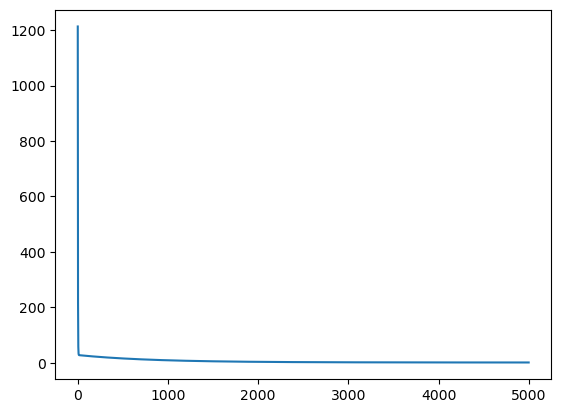

In [203]:
plt.plot(track);

# 4.3 Линейная регрессия: аналитический и численный подходы

## Импорт библиотек, установка константных значений

In [204]:
import numpy as np
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt

In [205]:
RANDOM_STATE = 42
np.random.RandomState(RANDOM_STATE);

## Постановка задачи

Сгенерируем данные для задачи регрессии

In [206]:
X, y = make_regression(n_samples=100, n_features=1, random_state=RANDOM_STATE, noise=10.0, bias=100.0)

Нарисуем сгенерированные данные

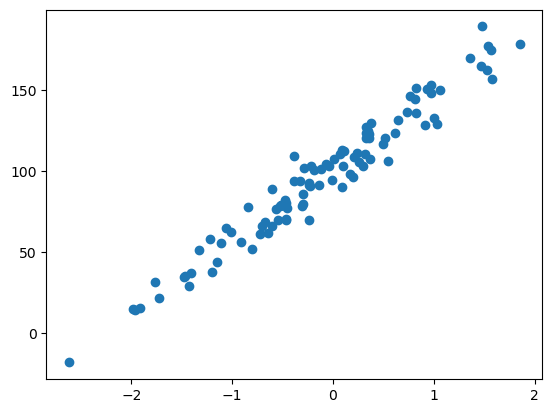

In [207]:
plt.scatter(X, y);

## Аналитический подход

Решим задачу по точной формуле
$$w = (X^TX)^{-1}X^Ty$$

In [208]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

pred_lr = lr.predict(X)

Посчитаем качество предсказания (будем использовать метрику $R^2$) и визуализируем результат.

r2: 0.9538252459635717


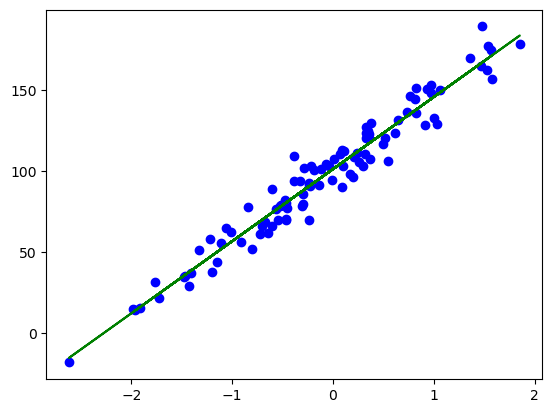

In [209]:
from sklearn.metrics import r2_score

plt.scatter(X, y, c='blue')
plt.plot(X, pred_lr, '-', c='green')

print('r2:',r2_score(y, pred_lr))

## Численный подход

Теперь обучим `SGDRegressor` и сделаем предсказание.

In [210]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
sgd.fit(X, y)

pred_sgd = sgd.predict(X)

Добавим предсказание на график с исходными объектами и вычислим $R^2$.

r2: 0.9538248736018142


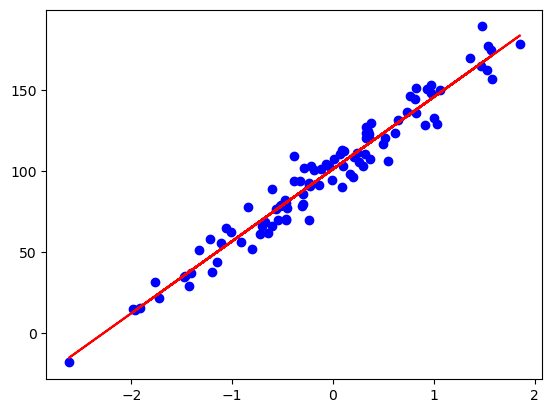

In [211]:
plt.scatter(X, y, c='blue')
plt.plot(X, pred_sgd, '-', c='red')

print('r2:',r2_score(y, pred_sgd))

Сравним качество предсказний точным и численным методами

In [212]:
print('r2 exact:',r2_score(y, pred_lr))
print('r2 numeric:',r2_score(y, pred_sgd))

r2 exact: 0.9538252459635717
r2 numeric: 0.9538248736018142


Численный подход дает чуть меньшее значение метрики качества, но разница в значениях $R^2$  
начинается в шестом знаке после запятой, то есть можно смело считать, что разницы в качестве нет.

# 4.4  Домашнее задание - 3

## Импорт библиотек, установка константных значений

In [213]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_regression, fetch_california_housing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [214]:
RANDOM_STATE = 123
TRAIN_SIZE = 0.75

In [215]:
np.random.RandomState(RANDOM_STATE)

RandomState(MT19937) at 0x1D58B449640

In [216]:
np.random.seed(RANDOM_STATE)

X, y, _ = make_regression(n_samples=100000,              # число объектов
                          n_features=10,                 # число признаков
                          n_informative=8,               # число информативных признаков
                          noise=100,                     # уровень шума в данных
                          coef=True,                     # значение True используется при генерации данных
                          random_state=RANDOM_STATE)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
# X[10] = X[6] + X[7] + np.random.random()*0.01

## Практика

Реализуем метод градиентного спуска для обучения линейной регрессии.

### Задание 1 (1 балл)


Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле:

$$w = (X^TX)^{-1}X^Ty$$

Комментарий: для поиска решения в векторном виде сначала необходимо добавить единичный столбец к матрице $X$.
Это сделано в коде.

In [217]:
def ols_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    # ваш код здесь

    w = np.linalg.inv(X.T @ X) @ (X.T @ y)
    return w

### Задание 2 (1 балл)

Заполните функцию для предсказания модели по формуле
$$a(X)=Xw$$

In [218]:
def prediction(X, w):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    # ваш код здесь
    return X @ w

Продублируем функцию для вычисления значения MSE из урока

In [219]:
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

### Задание 3

Скопируйте метод градиентного спуска из [урока](https://colab.research.google.com/drive/1Bos0LeQP9AAB-nrS0z8b-8ag5xRSEdty?usp=sharing) в этот ноутбук.


In [220]:
# ваш код здесь
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем к Х столбец из 1
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

### Бонус для отважных

Если чувствуете в себе силы, попробуйте написать SGD сами.

Модифицируйте метод градиентного спуска из урока так, чтобы это теперь был метод стохастического градиентного спуска:

* на каждой итерации выбирайте один случайный индекс `j` при помощи функции `random.randint`

* градиент на каждой итерации градиентного спуска считайте не как сумму градиентов по всем объектам, а только по одному объекту с индексом `j`

* на каждой итерации вычисляйте значение функции потерь и сохраняйте в список `cost_track`, который верните вместе с результатом работы функции

In [221]:
import random

def stochastic_gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])
    theta = np.random.randn(2, 1) 

    j = 0
    cost_history = []  


    cost_track = np.zeros((iterations,1))

    for i in range(iterations):

        # выберите случайный индекс в диапазон от 0 до len(X)-1 включительно при помощи функции random.randint
        j = random.randint(0, len(X))

        # обновите веса, используя сдвиг по градиенту только по объекту X[j] (делить на m в данном случае не нужно)
        params = params - 2. * learning_rate * X.T * (X @ params - y)
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

- Обучите линейную регрессию тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии ($X, y$). Для GD и самостоятельно написанного SGD используйте `learning_rate = 0.01, iterations = 10000`.

*P.S. Если же вы используете не самописный SGD, а SGDRegressor из библиотеки sklearn.linear_model, то его объявляйте с гиперпараметрами по умолчанию, то есть в скобках при объявлении модели ничего не указывайте.*

- С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (`from sklearn.metrics import r2_score`). Для получения предсказания использовуйте функцию `predict`.


In [222]:
# **План**

# 1 - находим веса одним из методов

# 2 - применяем функцию prediction для получения предсказаний с найденными весами (либо predict в случае использования SGDRegressor из библиотеки sklearn)

# 3 - вычисляем значение метрики r2

In [223]:
w_linreg = ols_solution(X, y)
y_pred_linreg = prediction(X, w_linreg)

In [224]:
linreg_model_2 = LinearRegression()
linreg_model_2.fit(X, y)
y_pred_linreg_2 = linreg_model_2.predict(X)

In [225]:
learning_rate = 0.01
iterations = 10000

cost_track_gd, w_gd = gradient_descent(X, y, learning_rate, iterations)
y_pred_gd = prediction(X, w_gd)

In [226]:
# learning_rate = 0.01
# iterations = 10000

# track, w_sgd = stochastic_gradient_descent(X, y, learning_rate, iterations)
# y_pred_sgd = prediction(X, w_sgd)

## Quiz

Чему равно значение метрики $R^2$ для аналитического подхода?

Ответ округлите до сотых.

In [227]:
sgd = SGDRegressor()
sgd.fit(X, y)
y_pred_sgd = sgd.predict(X)

In [228]:
# LR
from sklearn.metrics import r2_score
print('R^2 func : {:.2}'.format(r2_score(y, y_pred_linreg)))
print('R^2 linreg : {:.2}'.format(r2_score(y, y_pred_linreg_2)))
print('R^2 GD : {:.2}'.format(r2_score(y, y_pred_gd)))
print('R^2 SGD : {:.2}'.format(r2_score(y, y_pred_sgd)))

R^2 func : 0.76
R^2 linreg : 0.76
R^2 GD : 0.76
R^2 SGD : 0.75


## Quiz

Нарисуйте траекторию уменьшения ошибки при обучении градиентного спуска (это параметр `cost_track`, возвращаемый функцией).

Чему приблизительно равен loss модели на последних итерациях?

Выберите наиболее близкий к полученному вами ответ.

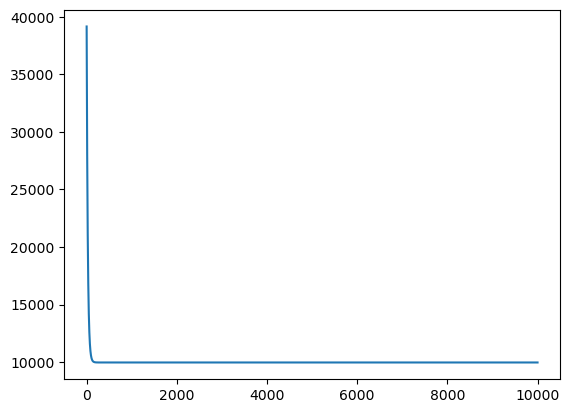

In [229]:
# your code here
plt.plot(cost_track_gd);

In [230]:
# your code for SGD here


## Quiz

Измерьте время работы аналитического подхода, а также GD и SGD (используйте magic command [`%%time`](https://ipython.readthedocs.io/en/stable/interactive/magics.html)).

Упорядочите результаты по возрастанию.

## Тестирование моделей на реальных данных

В реальных задачах никто не пишет методы с нуля, если они уже реализованы в python. Самостоятельная реализация методов полезна для получения навыков программирования и более глубокого понимания алгоритмов.

Давайте применим уже готовые методы из `sklearn` для решения задачи регрессии.

In [231]:
data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

Разобъем данные на трейн и тест

In [232]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE
    )

Для решения этой задачи попробуйте следующие модели:

* `LinearRegression` из `sklearn`
* `SGDRegressor` из `sklearn`

Обучите модели на тренировочных данных с параметрами по умолчанию и сделайте предсказание на тесте.
Вычислите значение $R^2$

In [233]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
y_pred_linreg = linreg_model.predict(X_train)

sgd_model = SGDRegressor(penalty=None, learning_rate='constant', eta0=0.005, max_iter=100000)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_train)

In [234]:
print('R^2 linreg : {:.2}'.format(r2_score(y_train, y_pred_linreg)))
print('R^2 SGD : {:.2}'.format(r2_score(y_train, y_pred_sgd)))

R^2 linreg : 0.61
R^2 SGD : -1e+31


In [235]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

## Quiz

Чему равно значение $R^2$ для модели LinearRegression на тестовых данных?

Ответ округлите до сотых.

In [236]:
# ваш код здесь (SGD Regressor)
...

## Quiz

Какая модель с параметрами по умолчанию лучше справилась с предсказанием стоимости домов в Калифорнии?

## Quiz

Проинтерпретируйте качество метода SGDRegressor. Выберите наиболее подходящий вариант.

# 5.1 Классификация

# Бинарные классификаторы

## Импорт библиотек

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Функция потерь

Бинарный линейный классификатор делает предсказание по формуле
$$a(x) = (w,x).$$

А вот функции потерь у разных классификаторов разные.

*  Функция потерь логистической регрессии:

$$
Q_{LR}(X, w) = -\frac{1}{\ell} \sum_{i=1}^{\ell} [y_i = 1]\log\sigma(\langle x_i, w \rangle) + [y_i = -1]\log(1-\sigma(\langle x_i, w \rangle),
$$
где $\sigma(z)=\frac1{1+e^{-z}}$.


Эта функция называется log-loss.

*  Функция потерь метода опорных векторов:

$$
Q_{SVM}(X, w) = C\sum_{i=1}^{l} \max\{0, 1 - y_i(\langle x_i, w\rangle)\} + \|w\|^2 \to \min_w,
$$
где $C$ - гиперпараметр.

Рассмотрим свойства логистической регрессии и метода опорных векторов на примере классического набора данных ["Ирисы Фишера"](https://ru.wikipedia.org/wiki/Ирисы_Фишера). Этот набор состоит из 150 наблюдений, каждое из которых представляет собой четыре измерения: длина наружной доли околоцветника (`sepal length`), ширина наружной доли околоцветника (`sepal width`), длина внутренней доли околоцветника (`petal length`), ширина внутренней доли околоцветника (`petal width`). Каждое наблюдение относится к одному из трёх классов ириса: `setosa`, `versicolor` или `virginica`.

Задача состоит в том, чтобы по измерениям предсказать класс цветка.

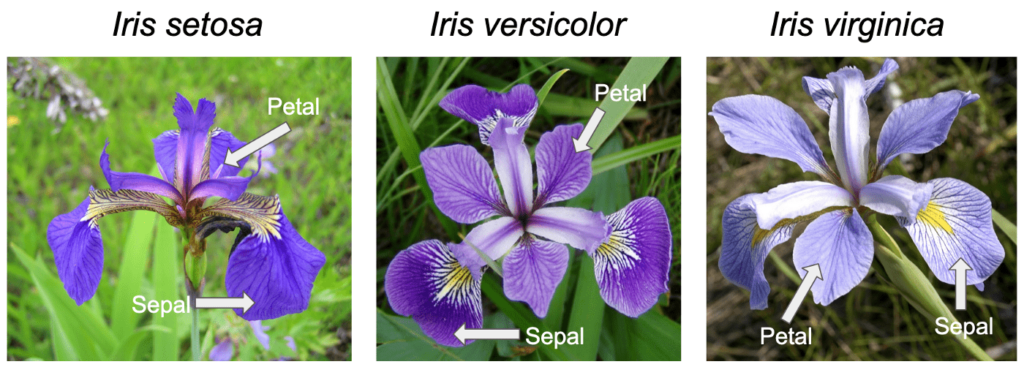

## Обзор данных

In [238]:
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [239]:
set(y)

{0, 1, 2}

## Задача

Перейдём к задаче бинарной классификации: будем предсказывать принадлежность цветка к виду `versicolor` против принадлежности ко всем прочим видам. Перекодируем целевую переменную так, чтобы цветки вида `versicolor` имели метку 1, а прочих видов – метку 0.

In [240]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [241]:
y[y != 1] = 0

y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Наши следующие действия:

*  Будем работать с двумя признаками: `sepal length (cm)` и `sepal width (cm)`. Сделаем из  них в отдельную матрицу.
*  Отмасштабируем выборки при помощи StandardScaler.
*  Построим диаграмму рассеяния по тренировочной выборке и убедимся, что данные линейно не разделимы.

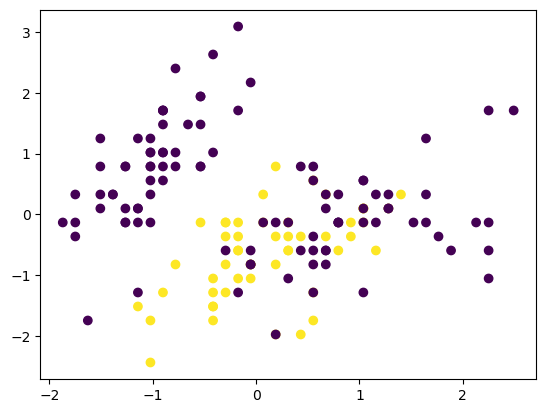

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(123)

X = X[['sepal length (cm)', 'sepal width (cm)']]

ss = StandardScaler()
X = ss.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], c = y);

Обучим логистическую регрессию и метод опорных векторов на тренировочной выборке и убедимся, что полученные веса различаются.

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

lr = LogisticRegression()
lr.fit(X, y)

svm = LinearSVC()
svm.fit(X, y)

print(lr.coef_)
print(svm.coef_)

[[ 0.1033129  -1.29975427]]
[[ 0.02577291 -0.52074853]]


Теперь посмотрим, как различаются решающие поверхности алгоритмов.

Код ниже построит решающие поверхности для классификаторов.

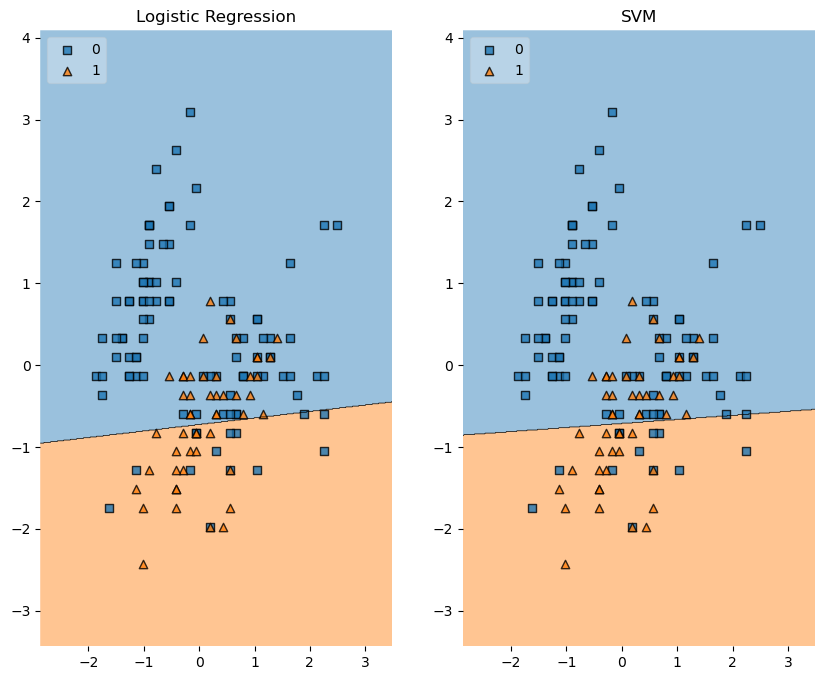

In [244]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(1, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'SVM']
for clf, lab, grd in zip([lr, svm],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=np.array(y), clf=clf, legend=2)
    plt.title(lab)

plt.show();

In [245]:
-np.log2(0.5)

1.0

# 5.2 Логистическая регрессия

Обучим логистическую регрессию для предсказания того, откликнется клиент  
на рекламное предложение (target = 1) или нет (target = 0).

In [246]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [247]:
# считаем данные
data = pd.read_csv('data/clients_data.csv')

In [248]:
data.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
0,49,1,0,1,2,1,5000.0,1,1,2,0
1,32,1,0,1,3,3,12000.0,1,1,1,0
2,52,1,0,1,4,0,9000.0,2,1,0,0
3,39,1,0,1,1,1,25000.0,1,1,3,0
4,30,1,0,0,0,0,12000.0,2,1,2,0


In [249]:
from sklearn.model_selection import train_test_split

X = data.drop('TARGET', axis=1)
y = data['TARGET']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=123)

Обучим логистическую регрессию с параметрами по умолчанию.

In [250]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [251]:
lr.fit(Xtrain, ytrain)

prediction = lr.predict(Xtest)

In [252]:
prediction[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Посмотрим на долю правильных ответов модели.

In [253]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, prediction)

0.8767243266914824

Теперь предскажем вероятности классов с помощью обученной логистической регрессии на тестовых данных.

In [254]:
probs_test = lr.predict_proba(Xtest)

probs_test[:10]

array([[0.93859981, 0.06140019],
       [0.90059017, 0.09940983],
       [0.71082708, 0.28917292],
       [0.78458641, 0.21541359],
       [0.87089413, 0.12910587],
       [0.95850985, 0.04149015],
       [0.93632296, 0.06367704],
       [0.96561737, 0.03438263],
       [0.94889178, 0.05110822],
       [0.93091158, 0.06908842]])

У обученной модели можно посмотреть веса (как и в линейной регрессии).  
Выведем на экран веса модели (`model.coef_`, `model.intercept_`).

In [255]:
lr.coef_, lr.intercept_

(array([[-4.61791123e-02, -1.47046760e-01, -8.61083355e-02,
         -1.54071068e-01,  1.91465578e-01, -1.41670349e-01,
          2.01714945e-05, -6.01051754e-02, -2.31264088e-01,
          2.92920989e-01]]),
 array([-0.24167028]))

# Задание по Логистической регрессии

Обучим логистическую регрессию для предсказания того, откликнется клиент  
на рекламное предложение (target = 1) или нет (target = 0).

## Подлючение библиотек, загрузка и обзор данных

In [256]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [257]:
data = pd.read_csv('data/clients_data.csv')

In [258]:
data.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
0,49,1,0,1,2,1,5000.0,1,1,2,0
1,32,1,0,1,3,3,12000.0,1,1,1,0
2,52,1,0,1,4,0,9000.0,2,1,0,0
3,39,1,0,1,1,1,25000.0,1,1,3,0
4,30,1,0,0,0,0,12000.0,2,1,2,0


In [259]:
from sklearn.model_selection import train_test_split

X = data.drop('TARGET', axis=1)
y = data['TARGET']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=123)

## Практика

**Задание**  
Выведите на экран количество объектов каждого класса. Сколько процентов объектов относятся к положительному классу?  
Ответ округлите до целого числа (например, если доля объектов положительного класса равна 0.412, в ответ запишите 41,  
имея в виду 41 процент).

In [260]:
# ваш код здесь
y.value_counts(normalize=True).round(2) * 100

TARGET
0    88.0
1    12.0
Name: proportion, dtype: float64

Обучим логистическую регрессию с параметрами по умолчанию.

In [261]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [262]:
lr.fit(Xtrain, ytrain)

prediction = lr.predict(Xtest)

Метрику accuracy не стоит использовать при сильном дисбалансе классов. Поэтому посчитайте f1_score для оценки качества модели на тестовых данных.

f1_score принимает значения от 0 до 1. Чем ближе к 1, тем лучше модель.

In [263]:
from sklearn.metrics import f1_score

# ваш код здесь
f1_score(ytest, prediction)

0.0

**Вопрос**  
Чему равен `f1_score`?

Удивительно, да?

Давайте разберемся, почему качество такое низкое.

Предскажем вероятности классов с помощью обученной логистической регрессии на тестовых данных.

In [264]:
probs_test = lr.predict_proba(Xtest)

probs_test[:10]

array([[0.93859981, 0.06140019],
       [0.90059017, 0.09940983],
       [0.71082708, 0.28917292],
       [0.78458641, 0.21541359],
       [0.87089413, 0.12910587],
       [0.95850985, 0.04149015],
       [0.93632296, 0.06367704],
       [0.96561737, 0.03438263],
       [0.94889178, 0.05110822],
       [0.93091158, 0.06908842]])

По вероятностям видно, что вероятности отнесения к положительному классу очень низкие.

Попробуем изменить порог для перевода вероятности в классы.

**Вопрос**  
Чему равен `f1_score`, если все объекты с вероятностью не меньшей 0.1, относить к положительному классу?

Ответ округлите до сотых.

In [265]:
# ваш код здесь
new_prediction = (probs_test[:,1] >= 0.1).astype(int)
f1_score(ytest, new_prediction).round(2)

0.25

У обученной модели можно посмотреть веса (как и в линейной регрессии).  
Выведем на экран веса модели (`model.coef_`, `model.intercept_`).

In [266]:
lr.coef_, lr.intercept_

(array([[-4.61791123e-02, -1.47046760e-01, -8.61083355e-02,
         -1.54071068e-01,  1.91465578e-01, -1.41670349e-01,
          2.01714945e-05, -6.01051754e-02, -2.31264088e-01,
          2.92920989e-01]]),
 array([-0.24167028]))

Создайте `pd.DataFrame`, где в первом столбце стоят названия признаков, а во втором - их веса (так удобнее анализировать результат).  
Отсортируйте таблицу по убыванию весов.

**Вопрос**  
Какой признак имеет наибольший положительный вес?

In [267]:
# ваш код здесь
coef_df = pd.DataFrame({'features_name': X.columns,
                        'coef': lr.coef_.reshape(-1)})
coef_df.sort_values('coef', ascending=False)

,features_name,coef
9,LOAN_DLQ_NUM,0.292921
4,CHILD_TOTAL,0.191466
6,PERSONAL_INCOME,0.000020
0,AGE,-0.046179
7,LOAN_NUM_TOTAL,-0.060105
2,SOCSTATUS_PENS_FL,-0.086108
5,DEPENDANTS,-0.141670
1,SOCSTATUS_WORK_FL,-0.147047
3,GENDER,-0.154071
8,LOAN_NUM_CLOSED,-0.231264


In [268]:
coef_df = pd.DataFrame({'features_name': X.columns})
coef_df

,features_name
0,AGE
1,SOCSTATUS_WORK_FL
2,SOCSTATUS_PENS_FL
3,GENDER
4,CHILD_TOTAL
5,DEPENDANTS
6,PERSONAL_INCOME
7,LOAN_NUM_TOTAL
8,LOAN_NUM_CLOSED
9,LOAN_DLQ_NUM


## Бонус

**Задание 1**  
Подберите порог для перевода вероятностей в классы, дающий максимальное значение `f1_score`.

In [269]:
# ваш код здесь
thresholds = np.linspace(0, 0.3, 150)
best_threshold = 0
best_f1_score = 0
for threshold in thresholds:
    prediction = (probs_test[:,1] >= threshold).astype(int)
    f1 = f1_score(ytest, prediction)
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold
print(f'best_f1_score: {best_f1_score:.5f}, best_threshold : {best_threshold:.5f}')

best_f1_score: 0.26411, best_threshold : 0.10872


**Задание 2**  
Во вложенном цикле подберите одновременно коэффициент регуляризации `C` у логистической регрессии и порог для перевода вероятностей в классы, дающие максимальное значение `f1_score`.

По-хорошему, чтобы не переобучиться, эти величины надо подбирать не по тесту, а по отдельной выборке.

Поэтому разобъем данные изначально на три части: `Xtrain`, `Xval`, `Xtest`.

*   В цикле при подборе `С` и порога будем обучаться по `Xtrain`, а предсказывать и измерять качество по `Xval`.

*   Качество итоговой модели с найденными `C` и порогом измерьте по `Xtest`.

Так не переобучимся!


In [270]:
Xtrain_new, Xval, ytrain_new, yval = train_test_split(Xtrain, ytrain, train_size=0.7, random_state=123)

# ваш код для подбора C и порога здесь

for m in np.arange(1, 100, 10):

    model_ = LogisticRegression(C = m, n_jobs=-1)
    model_.fit(Xtrain_new, ytrain_new)
    probs_ = model_.predict_proba(Xval)
    best_threshold_ = 0
    best_f1_ = 0
    best_c = 0

    for j in probs_[:, 1]:
        predict_ = (probs_[:, 1] > j).astype(int)
        f1_ = f1_score(yval, predict_)
        if f1_ > best_f1_:
            best_f1_score_ = f1_
            best_threshold_ = j   
            best_c = m

print(f'best_f1_score: {best_f1_score_:.5f}, \
      \nbest_threshold : {best_threshold_:.5f} \
      \nbest_c : {best_c}')

best_f1_score: 0.22985,       
best_threshold : 0.07958       
best_c : 91


In [271]:
model = LogisticRegression(C = best_c)

model.fit(Xtrain, ytrain) # обучаемся на всех тренировочных данных

prediction = model.predict_proba(Xtest)

classes = (prediction[:, 1] > best_threshold_).astype(int)

In [272]:
# вычислите значение f1_score на тестовых данных

f1_score(ytest, classes)

0.24088748019017434

# 5.3 Базовые метрики классификации